In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
df = pd.read_csv('data.csv')
df

,instnm,Applicants total (ADM2014_RV),Applicants men (ADM2014_RV),Applicants women (ADM2014_RV),Admissions total (ADM2014_RV),Admissions men (ADM2014_RV),Admissions women (ADM2014_RV),SAT Math 25th percentile score (ADM2014_RV),SAT Math 75th percentile score (ADM2014_RV),Applicants total (IC2013_RV),Applicants men (IC2013_RV),Applicants women (IC2013_RV),Admissions total (IC2013_RV),Admissions men (IC2013_RV),Admissions women (IC2013_RV),SAT Math 25th percentile score (IC2013_RV),SAT Math 75th percentile score (IC2013_RV),Applicants total (IC2012_RV),Applicants men (IC2012_RV),Applicants women (IC2012_RV),Admissions total (IC2012_RV),Admissions men (IC2012_RV),Admissions women (IC2012_RV),SAT Math 25th percentile score (IC2012_RV),SAT Math 75th percentile score (IC2012_RV),Applicants total (IC2011_RV),Applicants men (IC2011_RV),Applicants women (IC2011_RV),Admissions total (IC2011_RV),Admissions men (IC2011_RV),Admissions women (IC2011_RV),SAT Math 25th percentile score (IC2011_RV),SAT Math 75th percentile score (IC2011_RV),Applicants total (IC2010_RV),Applicants men (IC2010_RV),Applicants women (IC2010_RV),Admissions total (IC2010_RV),Admissions men (IC2010_RV),Admissions women (IC2010_RV),SAT Math 25th percentile score (IC2010_RV),SAT Math 75th percentile score (IC2010_RV),Applicants total (IC2009_RV),Applicants men (IC2009_RV),Applicants women (IC2009_RV),Admissions total (IC2009_RV),Admissions men (IC2009_RV),Admissions women (IC2009_RV),SAT Math 25th percentile score (IC2009_RV),SAT Math 75th percentile score (IC2009_RV),Applicants total (IC2008_RV),...,SAT Math 25th percentile score (IC2007),SAT Math 75th percentile score (IC2007),Applicants total (IC2006),Applicants men (IC2006),Applicants women (IC2006),Admissions total (IC2006),Admissions men (IC2006),Admissions women (IC2006),SAT Math 25th percentile score (IC2006),SAT Math 75th percentile score (IC2006),Applicants total (IC2005),Applicants men (IC2005),Applicants women (IC2005),Admissions total (IC2005),Admissions men (IC2005),Admissions women (IC2005),SAT I Math 25th percentile score (IC2005),SAT I Math 75th percentile score (IC2005),Applicants total (IC2004),Applicants men (IC2004),Applicants women (IC2004),Admissions total (IC2004),Admissions men (IC2004),Admissions women (IC2004),SAT I Math 25th percentile score (IC2004),SAT I Math 75th percentile score (IC2004),Applicants total (IC2003),Applicants men (IC2003),Applicants women (IC2003),Admissions total (IC2003),Admissions men (IC2003),Admissions women (IC2003),SAT I Math 25th percentile score (IC2003),SAT I Math 75th percentile score (IC2003),Applicants total (IC2002),Applicants men (IC2002),Applicants women (IC2002),Admissions total (IC2002),Admissions men (IC2002),Admissions women (IC2002),SAT 1 Math 25th percentile score (IC2002),SAT 1 Math 75th percentile score (IC2002),Applicants total (IC2001),Applicants men (IC2001),Applicants women (IC2001),Admissions total (IC2001),Admissions men (IC2001),Admissions women (IC2001),SAT 1 Math 25th percentile score (IC2001),SAT 1 Math 75th percentile score (IC2001)
Brigham Young University-Provo,11078,4171,6907,5207,1695,3512,580,680,11423,4026,7397,5645,1777,3868,580,680,12557,5385,7172,6895,3124,3771,590,690,11238,4772,6466,7055,3106,3949,580,680,10913,4831,6082,7020,3276,3744,580,690,10212,4484,5728,7049,3228,3821,570,680,10081,4372,...,680,9737,4237,5500,6827,3104,3723,570,680,8696,3672,5024,6794,2940,3854,570,670,9237,3928,5309,7023,3032,3991,570,670,9300,3995,5305,7227,3175,4052,560,670,8592,3629,4963,6208,2823,3385,540,650,10293,4525,5768,6739,2947,3792,NaN,NaN,NaN
Georgia Institute of Technology-Main Campus,25884,18051,7833,8641,5414,3227,680,770,14645,10009,4636,8045,5253,2792,660,760,14088,9501,4587,7210,4560,2650,660,760,13495,9130,4365,6976,4479,2497,650,740,11432,7684,3748,6721,4475,2246,650,750,10258,6932,3326,6248,4248,2000,650,730,9664,6522,...,730,9250,6282,2968,6163,4233,1930,640,720,9172,6479,2693,6191,4337,1854,650,730,8568,6104,2464,6008,4249,1759,64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Brigham Young University-Provo to University of California-Berkeley
Columns: 113 entries, instnm to SAT 1 Math 75th percentile score (IC2001)
dtypes: float64(3), int64(110)
memory usage: 5.3+ KB


In [9]:
application_totals_names = []
admission_totals_names = []
SAT_25_names = []
SAT_75_names = []
column_names = list(df)
column_names.reverse()
for index, column in enumerate(column_names):

    if 'Applicants total' in column:
        application_totals_names.append(column)
        
    if 'Admissions total' in column:
        admission_totals_names.append(column)
        
    if '25' in column:
        SAT_25_names.append(column)
    
    if '75' in column:
        SAT_75_names.append(column)


In [13]:
applicants_totals = df[application_totals_names].values
admission_totals = df[admission_totals_names].values


In [11]:
def get_acceptance(applicants, admissions):
    college_acceptance = admissions / applicants * 100
    return college_acceptance

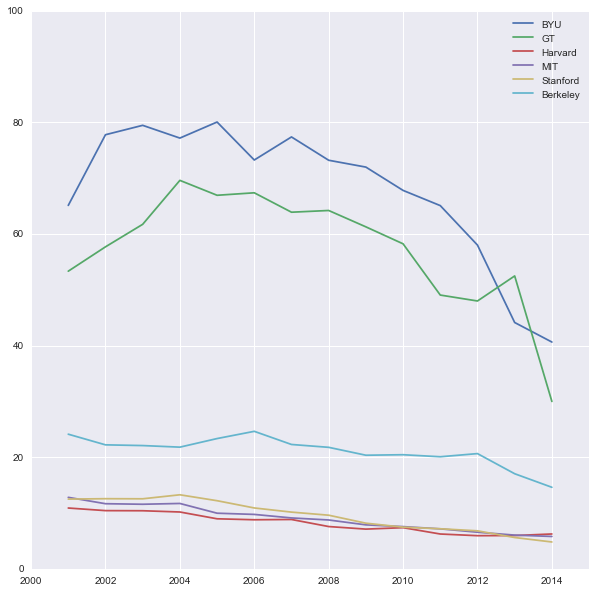

In [17]:
acceptance_scores = []
college_names = ['BYU', 'GT', 'Harvard', 'MIT', 'Stanford', 'Berkeley']
for applicants, admissions in zip(applicants_totals, admission_totals):
    college_acceptance = get_acceptance(applicants, admissions)
    acceptance_scores.append(college_acceptance)
    
years = np.array(list(range(2001, 2015)))
years.astype('float64')

fig, ax = plt.subplots(figsize=(10, 10))
rectangles = []
for score in acceptance_scores:
    rectangles.append(plt.errorbar(years, score))
    
plt.ylim([0, 100])
plt.xlim([2000, 2015])
plt.legend(rectangles, college_names)
plt.show()